In [2]:
import pyupset as pyu
import matplotlib as mpl
import matplotlib.pyplot as plt
from pickle import load
import pandas as pd
import glob 

%matplotlib inline

In [85]:
gene_table = pd.read_table('gene_presence_absence.csv', sep=',')

In [86]:
col_names = list(x for x in gene_table.columns if x.startswith('t_'))
col_names.sort()

col_names.insert(0, 'Gene')
print(col_names)

gene_table = pd.DataFrame(gene_table, columns=col_names)

['Gene', 't_centrarchi', 't_lynn', 't_maritimum', 't_mesophilum', 't_ovolyticum', 't_rebecca', 't_soleae', 't_sp47']


In [87]:
df = gene_table.groupby("Gene").count()
df.reset_index(level=0, inplace=True)

df[:10]

,Gene,t_centrarchi,t_lynn,t_maritimum,t_mesophilum,t_ovolyticum,t_rebecca,t_soleae,t_sp47
0,aadR,0,1,0,0,0,1,0,0
1,aarA,0,0,0,0,0,0,1,0
2,aarA_1,0,1,0,0,0,1,0,0
3,aarA_2,0,1,0,0,0,1,0,0
4,aat,0,1,0,0,0,1,0,1
5,accA,1,1,0,0,0,1,0,0
6,accA1,0,1,0,1,0,1,0,0
7,accA_2,0,1,0,0,0,0,0,1
8,accB,0,1,0,0,0,0,0,0
9,accC,1,1,0,0,0,1,1,0


In [89]:
grouped_d = {}
for spname in df.columns:
    if spname == 'Gene':
        continue
    sp_df = pd.DataFrame(df, columns=["Gene", spname])
    sp_df = sp_df.loc[sp_df[spname] == 1]
    print(spname, len(sp_df))
    grouped_d[spname] = sp_df

t_centrarchi 2475
t_lynn 3013
t_maritimum 141
t_mesophilum 578
t_ovolyticum 930
t_rebecca 3096
t_soleae 1428
t_sp47 692


In [91]:
keep = ['t_lynn', 't_rebecca', 't_mesophilum', 't_centrarchi', 't_soleae']

keylist = list(grouped_d.keys())
for k in keylist:
    if k not in keep:
        del grouped_d[k]


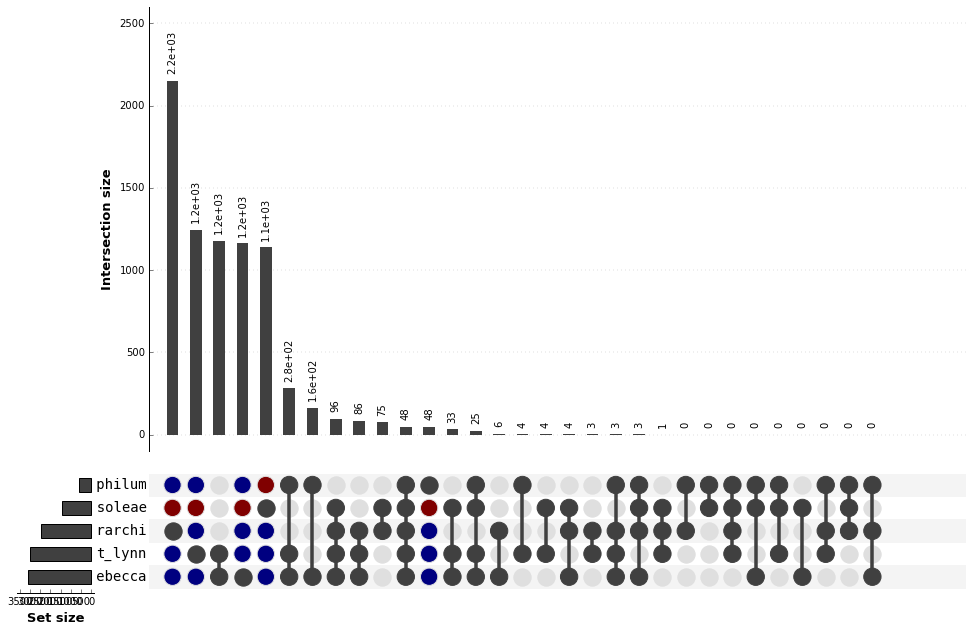

In [92]:
pplot=pyu.plot(grouped_d)